台风轨迹

In [16]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from   mpl_toolkits.basemap import Basemap as m
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from sklearn import mixture
from mpl_toolkits.basemap import Basemap,shiftgrid, cm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

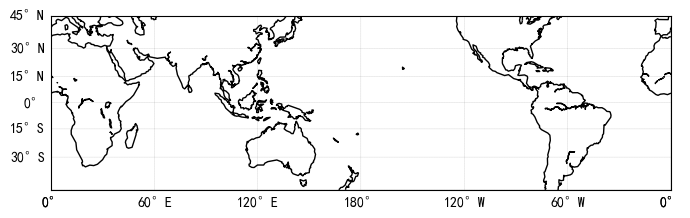

In [57]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from   mpl_toolkits.basemap import Basemap as m
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from sklearn import mixture
from mpl_toolkits.basemap import Basemap,shiftgrid, cm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
#############3
fig,ax= plt.subplots(1,1,figsize=(8, 5))
################################
ax.set_title("")
ax.text(0.05, 0.95, ' ', transform=ax.transAxes,
      fontsize=16, fontweight='bold', va='top')
df1= pd.read_excel(('D:/Data/typhoon/wenbiya.xlsx'))
m = m(projection='merc', llcrnrlat= -45, urcrnrlat=45.01,
            llcrnrlon=0, urcrnrlon=360.01, lat_ts=60, resolution='c')
m.drawcoastlines()
parallels = np.arange(  -45,  45.01, 15) 
meridians = np.arange(    0, 360.01, 60) 
m.drawparallels(parallels, linewidth=0.1, labels = [1, 0, 0, 1]) 
m.drawmeridians(meridians, linewidth=0.1, labels = [1, 0, 0, 1]) 

for  evento, group in df1.groupby(['Evento']):
    # print(evento)
     tmp    = group.values/10
     #print(tmp)
     #colors = ['r' if col>(50,) else 'r' for col in zip(tmp[::-1,3])]
     count=0
     #print(tmp[:-1,1:3],tmp[1:,1:3])
     for start, stop  in zip((tmp[:-1,1:3]),(tmp[1:,1:3])):
         if(tmp[count,3] < 50 ):
             col=0.1
         elif(tmp[count,3]<96):
             col=0.5
         else:
             col=0.9       
         x1 ,y1   = m(xx[0], yy[0])
         x2 ,y2   = m(xx[1], yy[1])

         ax.plot([x1,x2], [y1,y2], color=plt.cm.gist_ncar(col),alpha=0.5)
         count=count+1

###################################################
plt.savefig('tracks_1.png', format='png', transparent=True)




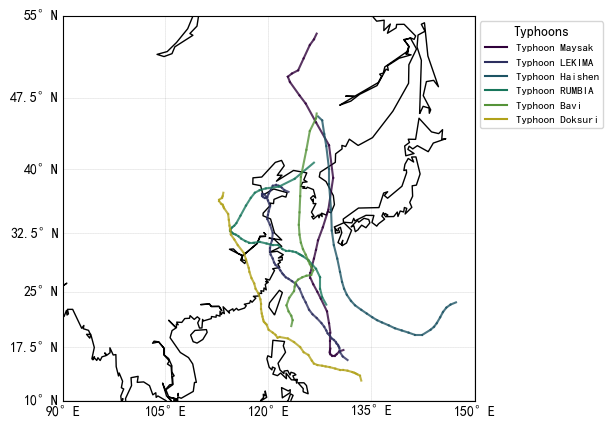

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# 台风名称
name = ['Maysak','LEKIMA','Haishen','RUMBIA','Bavi','Doksuri']

# 创建画布
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# 读取数据
df1 = pd.read_excel('D:/Data/typhoon/alltyphoon.xlsx')

# 设置地图
m = Basemap(projection='merc', llcrnrlat=10, urcrnrlat=55.01,
            llcrnrlon=90, urcrnrlon=150.01, lat_ts=15, resolution='c')
m.drawcoastlines()

# 绘制经纬度网格
parallels = np.arange(10, 55.01, 7.5)
meridians = np.arange(90, 150.01, 15)
m.drawparallels(parallels, linewidth=0.1, labels=[1, 0, 0, 1])
m.drawmeridians(meridians, linewidth=0.1, labels=[1, 0, 0, 1])

# 使用viridis调色板
unique_typhoons = df1['Evento'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_typhoons)))  # 按照台风数量分配颜色

# 台风颜色字典
typhoon_colors = {typhoon: colors[i] for i, typhoon in enumerate(unique_typhoons)}

# 绘制台风轨迹
for evento, group in df1.groupby(['Evento']):
    tmp = group.values / 10
    count = 0

    # 获取当前台风的颜色
    typhoon_color = typhoon_colors[evento]

    # 调整颜色深度，通过加深颜色的亮度
    typhoon_color = np.array(typhoon_color[:3]) * 0.7  # 将RGB颜色乘以0.7，减少亮度使颜色更深

    # 遍历每个轨迹段
    for start, stop in zip(tmp[:-1, 1:3], tmp[1:, 1:3]):
        xx, yy = zip(start, stop)
        #print(f"Start: {xx[0]}, {yy[0]}, Stop: {xx[1]}, {yy[1]}")  # 检查点

        # 转换经纬度为地图坐标
        x1, y1 = m(xx[0], yy[0])
        x2, y2 = m(xx[1], yy[1])

        # 绘制轨迹
        ax.plot([x1, x2], [y1, y2], color=typhoon_color, alpha=0.8)

    # 添加图例，确保每个台风只显示一次
    ax.plot([], [], color=typhoon_color, label=f'Typhoon {name[int(evento)-1]}')

# 添加图例
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Typhoons", fontsize=8)

# 保存图像
# 保存图像，设置dpi为300，图像会更加清晰
plt.savefig('D:/Data/typhoon/alltyphoon_1.png', format='png', transparent=True, bbox_inches='tight', dpi=400)

plt.show()


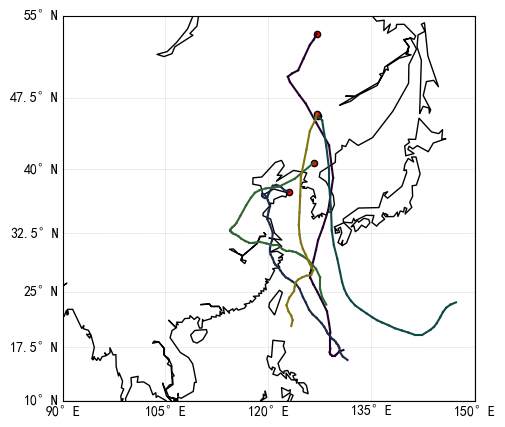

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# 台风名称
name = ['Maysak','LEKIMA','Haishen','RUMBIA','Bavi']

# 创建画布
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# 读取数据
df1 = pd.read_excel('D:/Data/typhoon/alltyphoon.xlsx')

# 设置地图
m = Basemap(projection='merc', llcrnrlat=10, urcrnrlat=55.01,
            llcrnrlon=90, urcrnrlon=150.01, lat_ts=15, resolution='c')
m.drawcoastlines()

# 绘制经纬度网格
parallels = np.arange(10, 55.01, 7.5)
meridians = np.arange(90, 150.01, 15)
m.drawparallels(parallels, linewidth=0.1, labels=[1, 0, 0, 1])
m.drawmeridians(meridians, linewidth=0.1, labels=[1, 0, 0, 1])

# 使用viridis调色板
unique_typhoons = df1['Evento'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_typhoons)))  # 按照台风数量分配颜色

# 台风颜色字典
typhoon_colors = {typhoon: colors[i] for i, typhoon in enumerate(unique_typhoons)}

# 绘制台风轨迹
for evento, group in df1.groupby(['Evento']):
    tmp = group.values / 10
    count = 0

    # 获取当前台风的颜色
    typhoon_color = typhoon_colors[evento]

    # 调整颜色深度，通过加深颜色的亮度
    typhoon_color = np.array(typhoon_color[:3]) * 0.5  # 将RGB颜色乘以0.7，减少亮度使颜色更深

    # 遍历每个轨迹段
    for start, stop in zip(tmp[:-1, 1:3], tmp[1:, 1:3]):
        xx, yy = zip(start, stop)
        #print(f"Start: {xx[0]}, {yy[0]}, Stop: {xx[1]}, {yy[1]}")  # 检查点

        # 转换经纬度为地图坐标
        x1, y1 = m(xx[0], yy[0])
        x2, y2 = m(xx[1], yy[1])

        # 绘制轨迹
        ax.plot([x1, x2], [y1, y2], color=typhoon_color, alpha=1)

    # 获取最后一个点的经纬度
    last_point = tmp[-1, 1:3]  # 最后一个点

    # 转换最后一个点的经纬度为地图坐标
    last_x, last_y = m(last_point[0], last_point[1])

    # 在最后一个点绘制红色大点
    ax.scatter(last_x, last_y, color='red', s=20, edgecolor='black', alpha=1)

# 添加图例
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Typhoons", fontsize=8)

# 保存图像，设置dpi为400，图像会更加清晰
plt.savefig('D:/Data/typhoon/alltyphoon_1.png', format='png', transparent=True, bbox_inches='tight', dpi=400)

# 显示图像
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


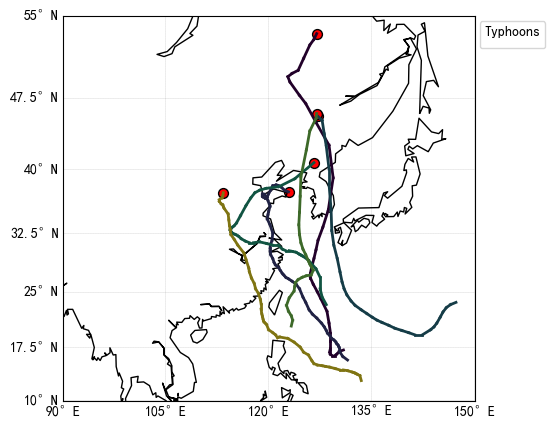

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# 台风名称
name = ['Maysak','LEKIMA','Haishen','RUMBIA','Bavi']

# 创建画布
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# 读取数据
df1 = pd.read_excel('D:/Data/typhoon/alltyphoon.xlsx')

# 设置地图
m = Basemap(projection='merc', llcrnrlat=10, urcrnrlat=55.01,
            llcrnrlon=90, urcrnrlon=150.01, lat_ts=15, resolution='c')
m.drawcoastlines()

# 绘制经纬度网格
parallels = np.arange(10, 55.01, 7.5)
meridians = np.arange(90, 150.01, 15)
m.drawparallels(parallels, linewidth=0.1, labels=[1, 0, 0, 1])
m.drawmeridians(meridians, linewidth=0.1, labels=[1, 0, 0, 1])

# 使用viridis调色板
unique_typhoons = df1['Evento'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_typhoons)))  # 按照台风数量分配颜色

# 台风颜色字典
typhoon_colors = {typhoon: colors[i] for i, typhoon in enumerate(unique_typhoons)}

# 绘制台风轨迹
for evento, group in df1.groupby(['Evento']):
    tmp = group.values / 10
    count = 0

    # 获取当前台风的颜色
    typhoon_color = typhoon_colors[evento]

    # 调整颜色深度，通过加深颜色的亮度
    typhoon_color = np.array(typhoon_color[:3]) * 0.5  # 将RGB颜色乘以0.5，减少亮度使颜色更深

    # 遍历每个轨迹段
    for start, stop in zip(tmp[:-1, 1:3], tmp[1:, 1:3]):
        xx, yy = zip(start, stop)
        #print(f"Start: {xx[0]}, {yy[0]}, Stop: {xx[1]}, {yy[1]}")  # 检查点

        # 转换经纬度为地图坐标
        x1, y1 = m(xx[0], yy[0])
        x2, y2 = m(xx[1], yy[1])

        # 绘制轨迹，调整linewidth使线条更粗
        ax.plot([x1, x2], [y1, y2], color=typhoon_color, alpha=1, linewidth=2)  # 设置linewidth=2，使线条更粗

    # 获取最后一个点的经纬度
    last_point = tmp[-1, 1:3]  # 最后一个点

    # 转换最后一个点的经纬度为地图坐标
    last_x, last_y = m(last_point[0], last_point[1])

    # 在最后一个点绘制红色大点
    ax.scatter(last_x, last_y, color='red', s=50, edgecolor='black', alpha=1)

# 添加图例
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Typhoons", fontsize=8)

# 保存图像，设置dpi为400，图像会更加清晰
plt.savefig('D:/Data/typhoon/alltyphoon_1.png', format='png', transparent=True, bbox_inches='tight', dpi=400)

# 显示图像
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


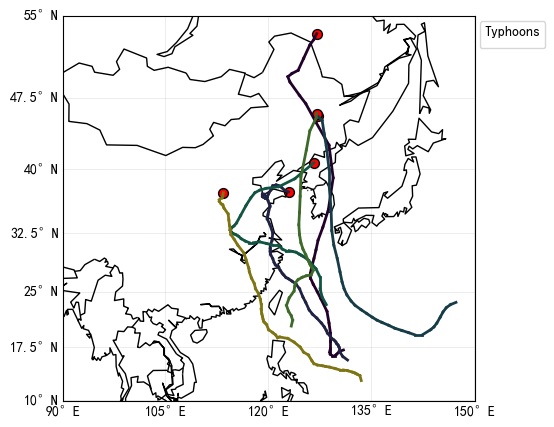

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# 台风名称
name = ['Maysak','LEKIMA','Haishen','RUMBIA','Bavi','doksuiri']

# 创建画布
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# 读取数据
df1 = pd.read_excel('D:/Data/typhoon/alltyphoon.xlsx')

# 设置地图
m = Basemap(projection='merc', llcrnrlat=10, urcrnrlat=55.01,
            llcrnrlon=90, urcrnrlon=150.01, lat_ts=15, resolution='c')
m.drawcoastlines()

# 绘制国家边界
m.drawcountries(linewidth=1, color='black')  # 设置边界线宽度为1，颜色为黑色

# 绘制经纬度网格
parallels = np.arange(10, 55.01, 7.5)
meridians = np.arange(90, 150.01, 15)
m.drawparallels(parallels, linewidth=0.1, labels=[1, 0, 0, 1])
m.drawmeridians(meridians, linewidth=0.1, labels=[1, 0, 0, 1])

# 使用viridis调色板
unique_typhoons = df1['Evento'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_typhoons)))  # 按照台风数量分配颜色

# 台风颜色字典
typhoon_colors = {typhoon: colors[i] for i, typhoon in enumerate(unique_typhoons)}

# 绘制台风轨迹
for evento, group in df1.groupby(['Evento']):
    tmp = group.values / 10
    count = 0

    # 获取当前台风的颜色
    typhoon_color = typhoon_colors[evento]

    # 调整颜色深度，通过加深颜色的亮度
    typhoon_color = np.array(typhoon_color[:3]) * 0.5  # 将RGB颜色乘以0.5，减少亮度使颜色更深

    # 遍历每个轨迹段
    for start, stop in zip(tmp[:-1, 1:3], tmp[1:, 1:3]):
        xx, yy = zip(start, stop)
        #print(f"Start: {xx[0]}, {yy[0]}, Stop: {xx[1]}, {yy[1]}")  # 检查点

        # 转换经纬度为地图坐标
        x1, y1 = m(xx[0], yy[0])
        x2, y2 = m(xx[1], yy[1])

        # 绘制轨迹，调整linewidth使线条更粗
        ax.plot([x1, x2], [y1, y2], color=typhoon_color, alpha=1, linewidth=2)  # 设置linewidth=2，使线条更粗

    # 获取最后一个点的经纬度
    last_point = tmp[-1, 1:3]  # 最后一个点

    # 转换最后一个点的经纬度为地图坐标
    last_x, last_y = m(last_point[0], last_point[1])

    # 在最后一个点绘制红色大点
    ax.scatter(last_x, last_y, color='red', s=50, edgecolor='black', alpha=1)

# 添加图例
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Typhoons", fontsize=8)

# 保存图像，设置dpi为400，图像会更加清晰
plt.savefig('D:/Data/typhoon/alltyphoon_1.png', format='png', transparent=True, bbox_inches='tight', dpi=400)

# 显示图像
plt.show()


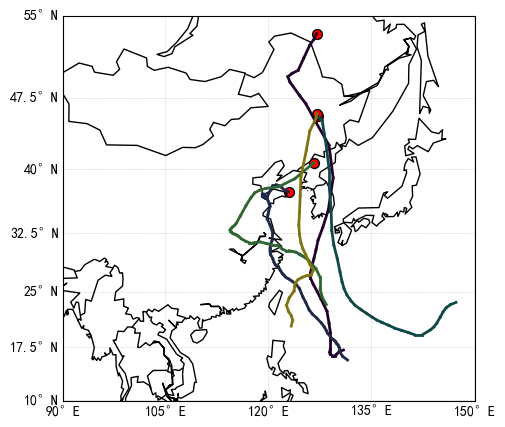

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# 台风名称
name = ['Maysak','LEKIMA','Haishen','RUMBIA','Bavi']

# 创建画布
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# 读取数据
df1 = pd.read_excel('D:/Data/typhoon/alltyphoon.xlsx')

# 设置地图
m = Basemap(projection='merc', llcrnrlat=10, urcrnrlat=55.01,
            llcrnrlon=90, urcrnrlon=150.01, lat_ts=15, resolution='c')
m.drawcoastlines()

# 绘制国家边界
m.drawcountries(linewidth=1, color='black')  # 设置边界线宽度为1，颜色为黑色

# 绘制经纬度网格
parallels = np.arange(10, 55.01, 7.5)
meridians = np.arange(90, 150.01, 15)
m.drawparallels(parallels, linewidth=0.1, labels=[1, 0, 0, 1])
m.drawmeridians(meridians, linewidth=0.1, labels=[1, 0, 0, 1])

# 使用viridis调色板
unique_typhoons = df1['Evento'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_typhoons)))  # 按照台风数量分配颜色

# 台风颜色字典
typhoon_colors = {typhoon: colors[i] for i, typhoon in enumerate(unique_typhoons)}

# 绘制台风轨迹
for evento, group in df1.groupby(['Evento']):
    tmp = group.values / 10
    count = 0

    # 获取当前台风的颜色
    typhoon_color = typhoon_colors[evento]

    # 调整颜色深度，通过加深颜色的亮度
    typhoon_color = np.array(typhoon_color[:3]) * 0.5  # 将RGB颜色乘以0.5，减少亮度使颜色更深

    # 遍历每个轨迹段
    for start, stop in zip(tmp[:-1, 1:3], tmp[1:, 1:3]):
        xx, yy = zip(start, stop)
        #print(f"Start: {xx[0]}, {yy[0]}, Stop: {xx[1]}, {yy[1]}")  # 检查点

        # 转换经纬度为地图坐标
        x1, y1 = m(xx[0], yy[0])
        x2, y2 = m(xx[1], yy[1])

        # 绘制轨迹，调整linewidth使线条更粗
        ax.plot([x1, x2], [y1, y2], color=typhoon_color, alpha=1, linewidth=2)  # 设置linewidth=2，使线条更粗

    # 获取最后一个点的经纬度
    last_point = tmp[-1, 1:3]  # 最后一个点

    # 转换最后一个点的经纬度为地图坐标
    last_x, last_y = m(last_point[0], last_point[1])

    # 在最后一个点绘制红色大点
    ax.scatter(last_x, last_y, color='red', s=50, edgecolor='black', alpha=1)

# 保存图像，设置dpi为400，图像会更加清晰
plt.savefig('D:/Data/typhoon/alltyphoon_1.png', format='png', transparent=True, bbox_inches='tight', dpi=400)

# 显示图像
plt.show()


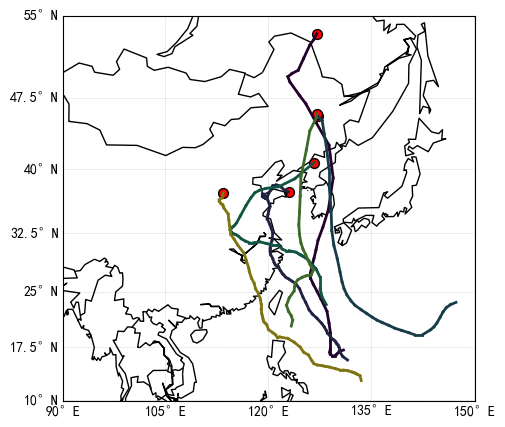

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# 台风名称
name = ['Maysak','LEKIMA','Haishen','RUMBIA','Bavi']

# 创建画布
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# 读取数据
df1 = pd.read_excel('D:/Data/typhoon/alltyphoon.xlsx')

# 设置地图
m = Basemap(projection='merc', llcrnrlat=10, urcrnrlat=55.01,
            llcrnrlon=90, urcrnrlon=150.01, lat_ts=15, resolution='c')
m.drawcoastlines()

# 绘制国家边界
m.drawcountries(linewidth=1, color='black')  # 设置边界线宽度为1，颜色为黑色

# 绘制经纬度网格
parallels = np.arange(10, 55.01, 7.5)
meridians = np.arange(90, 150.01, 15)
m.drawparallels(parallels, linewidth=0.1, labels=[1, 0, 0, 1])
m.drawmeridians(meridians, linewidth=0.1, labels=[1, 0, 0, 1])

# 使用viridis调色板
unique_typhoons = df1['Evento'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_typhoons)))  # 按照台风数量分配颜色

# 台风颜色字典
typhoon_colors = {typhoon: colors[i] for i, typhoon in enumerate(unique_typhoons)}

# 绘制台风轨迹
for evento, group in df1.groupby(['Evento']):
    tmp = group.values / 10
    count = 0

    # 获取当前台风的颜色
    typhoon_color = typhoon_colors[evento]

    # 调整颜色深度，通过加深颜色的亮度
    typhoon_color = np.array(typhoon_color[:3]) * 0.5  # 将RGB颜色乘以0.5，减少亮度使颜色更深

    # 遍历每个轨迹段
    for start, stop in zip(tmp[:-1, 1:3], tmp[1:, 1:3]):
        xx, yy = zip(start, stop)
        #print(f"Start: {xx[0]}, {yy[0]}, Stop: {xx[1]}, {yy[1]}")  # 检查点

        # 转换经纬度为地图坐标
        x1, y1 = m(xx[0], yy[0])
        x2, y2 = m(xx[1], yy[1])

        # 绘制轨迹，调整linewidth使线条更粗
        ax.plot([x1, x2], [y1, y2], color=typhoon_color, alpha=1, linewidth=2)  # 设置linewidth=2，使线条更粗

    # 获取最后一个点的经纬度
    last_point = tmp[-1, 1:3]  # 最后一个点

    # 转换最后一个点的经纬度为地图坐标
    last_x, last_y = m(last_point[0], last_point[1])

    # 在最后一个点绘制红色大点
    ax.scatter(last_x, last_y, color='red', s=50, edgecolor='black', alpha=1)

# 保存图像，设置dpi为400，图像会更加清晰
plt.savefig('D:/Data/typhoon/alltyphoon_1.png', format='png', transparent=True, bbox_inches='tight', dpi=400)

# 显示图像
plt.show()


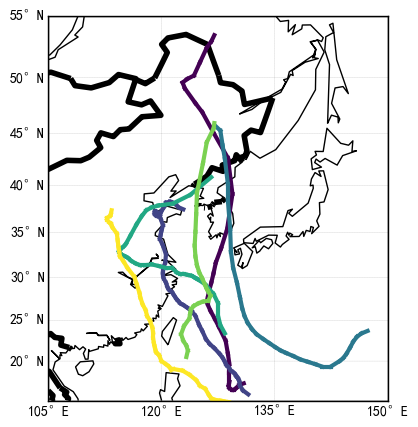

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# 台风名称
name = ['Maysak','LEKIMA','Haishen','RUMBIA','Bavi']

# 创建画布
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# 读取数据
df1 = pd.read_excel('D:/Data/typhoon/alltyphoon.xlsx')

# 设置地图
m = Basemap(projection='merc', llcrnrlat=15, urcrnrlat=55.01,
            llcrnrlon=105, urcrnrlon=150.01, lat_ts=15, resolution='c')
m.drawcoastlines()

# 绘制中国的边界
m.drawcountries(linewidth=4, color='black')  # 不绘制其他国家边界
m.drawmapboundary(linewidth=1, color='black')  # 设置地图边界为黑色
m.drawstates(linewidth=0.5, color='black')  # 可选，添加中国省界的边界（如果需要）

# 绘制经纬度网格
parallels = np.arange(15, 55.01, 5)
meridians = np.arange(105, 150.01, 15)
m.drawparallels(parallels, linewidth=0.1, labels=[1, 0, 0, 1])
m.drawmeridians(meridians, linewidth=0.1, labels=[1, 0, 0, 1])

# 使用viridis调色板
unique_typhoons = df1['Evento'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_typhoons)))  # 按照台风数量分配颜色

# 台风颜色字典
typhoon_colors = {typhoon: colors[i] for i, typhoon in enumerate(unique_typhoons)}

# 绘制台风轨迹
for evento, group in df1.groupby(['Evento']):
    tmp = group.values / 10
    count = 0

    # 获取当前台风的颜色
    typhoon_color = typhoon_colors[evento]

    # 调整颜色深度，通过加深颜色的亮度
    typhoon_color = np.array(typhoon_color[:3])   # 将RGB颜色乘以0.5，减少亮度使颜色更深

    # 遍历每个轨迹段
    for start, stop in zip(tmp[:-1, 1:3], tmp[1:, 1:3]):
        xx, yy = zip(start, stop)

        # 转换经纬度为地图坐标
        x1, y1 = m(xx[0], yy[0])
        x2, y2 = m(xx[1], yy[1])

        # 绘制轨迹，调整linewidth使线条更粗
        ax.plot([x1, x2], [y1, y2], color=typhoon_color, alpha=1, linewidth=3)  # 设置linewidth=2，使线条更粗

    # 获取最后一个点的经纬度
    last_point = tmp[-1, 1:3]  # 最后一个点

    # 转换最后一个点的经纬度为地图坐标
    last_x, last_y = m(last_point[0], last_point[1])

    # 在最后一个点绘制红色大点（增大点的大小以覆盖轨迹线）
    #ax.scatter(last_x, last_y, color='red', s=100, edgecolor='black', alpha=1)

# 保存图像，设置dpi为400，图像会更加清晰
plt.savefig('D:/Data/typhoon/alltyphoon_1.png', format='png', transparent=True, bbox_inches='tight', dpi=400)

# 显示图像
plt.show()


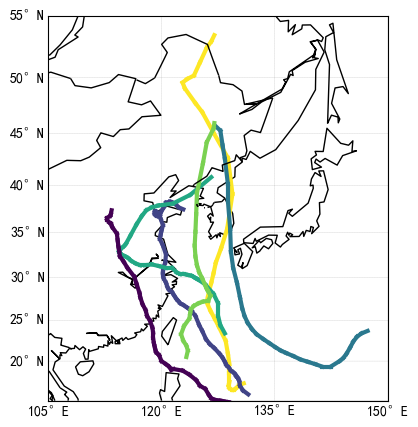

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# 台风名称
name = ['Maysak','LEKIMA','Haishen','RUMBIA','Bavi','Doksuri']

# 创建画布
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# 读取数据
df1 = pd.read_excel('D:/Data/typhoon/alltyphoon.xlsx')

# 设置地图
m = Basemap(projection='merc', llcrnrlat=15, urcrnrlat=55.01,
            llcrnrlon=105, urcrnrlon=150.01, lat_ts=15, resolution='c')
m.drawcoastlines()

# 绘制国家边界
#m.drawcountries(linewidth=1, color='grey')  # 设置所有国家边界为灰色

# 绘制中国边界
m.drawcountries(linewidth=1, color='black', linestyle='-', zorder=5)

# 绘制经纬度网格
parallels = np.arange(15, 55.01, 5)
meridians = np.arange(105, 150.01, 15)
m.drawparallels(parallels, linewidth=0.1, labels=[1, 0, 0, 1])
m.drawmeridians(meridians, linewidth=0.1, labels=[1, 0, 0, 1])

# 使用viridis调色板
unique_typhoons = df1['Evento'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_typhoons)))  # 按照台风数量分配颜色

# 台风颜色字典
typhoon_colors = {typhoon: colors[i] for i, typhoon in enumerate(unique_typhoons)}

# 绘制台风轨迹
for evento, group in df1.groupby(['Evento']):
    tmp = group.values / 10
    count = 0

    # 获取当前台风的颜色
    typhoon_color = typhoon_colors[evento]

    # 调整颜色深度，通过加深颜色的亮度
    typhoon_color = np.array(typhoon_color[:3])   # 将RGB颜色乘以0.5，减少亮度使颜色更深

    # 遍历每个轨迹段
    for start, stop in zip(tmp[:-1, 1:3], tmp[1:, 1:3]):
        xx, yy = zip(start, stop)

        # 转换经纬度为地图坐标
        x1, y1 = m(xx[0], yy[0])
        x2, y2 = m(xx[1], yy[1])

        # 绘制轨迹，调整linewidth使线条更粗
        ax.plot([x1, x2], [y1, y2], color=typhoon_color, alpha=1, linewidth=3)  # 设置linewidth=2，使线条更粗

    # 获取最后一个点的经纬度
    last_point = tmp[-1, 1:3]  # 最后一个点

    # 转换最后一个点的经纬度为地图坐标
    last_x, last_y = m(last_point[0], last_point[1])

    # 在最后一个点绘制红色大点（增大点的大小以覆盖轨迹线）
    #ax.scatter(last_x, last_y, color='red', s=100, edgecolor='black', alpha=1)
    # 添加图例，确保每个台风只显示一次
    #ax.plot([], [], color=typhoon_color, label=f'Typhoon {name[int(evento)-1]}')
# 添加图例

#plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Typhoons", fontsize=8)

# 保存图像
# 保存图像，设置dpi为300，图像会更加清晰
#plt.savefig('D:/Data/typhoon/alltyphoon_1.png', format='png', transparent=True, bbox_inches='tight', dpi=400)

# 保存图像，设置dpi为400，图像会更加清晰
plt.savefig('D:/Data/typhoon/alltyphoon_1.png', format='png', transparent=True, bbox_inches='tight', dpi=400)

# 显示图像
plt.show()
